In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv(r"C:\Users\madas\Downloads\loandata.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
610,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
611,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
612,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y


### clean the data and perform univariate analysis for continuous columns

In [71]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Data cleaning

In [39]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

### Missing values

In [40]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [42]:
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [43]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [44]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [45]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace = True)

In [46]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [47]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [48]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### duplicate values

In [49]:
df.duplicated().sum()

0

### outliers

In [50]:
q1 = df['Loan_Amount_Term'].quantile(0.25)
q3 = df['Loan_Amount_Term'].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5*iqr
upp = q3 + 1.5*iqr

In [51]:
#df[(df['Loan_Amount_Term']<low)|(df['Loan_Amount_Term']>upp)]

### univariate analysis

In [52]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,No,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N


<Axes: title={'center': 'Box of ApplicantIncome'}>

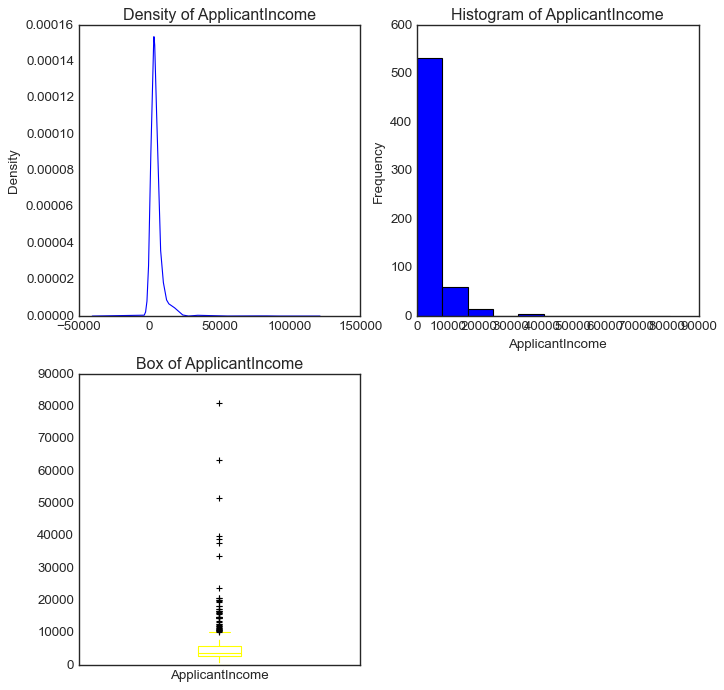

In [53]:
plt.subplot(221)
df['ApplicantIncome'].plot(kind = 'density',color = 'blue',title =  'Density of ApplicantIncome')

plt.subplot(222)
df['ApplicantIncome'].plot(kind = 'hist',xlabel = "ApplicantIncome",title =  'Histogram of ApplicantIncome')

plt.subplot(223)
df['ApplicantIncome'].plot(kind = 'box',color = 'yellow',title =  'Box of ApplicantIncome',figsize = (10,10))

<Axes: title={'center': 'Box of ApplicantIncome'}, xlabel='ApplicantIncome'>

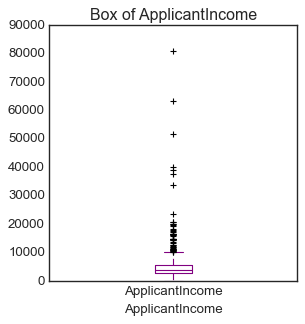

In [54]:
df['ApplicantIncome'].plot(kind = 'box',
               xlabel = "ApplicantIncome",
               color = 'purple',
               title =  'Box of ApplicantIncome',
               figsize = (4,4))

In [55]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [56]:
plt.style.use('dark_background')

<Axes: title={'center': 'Box of CoapplicantIncome'}>

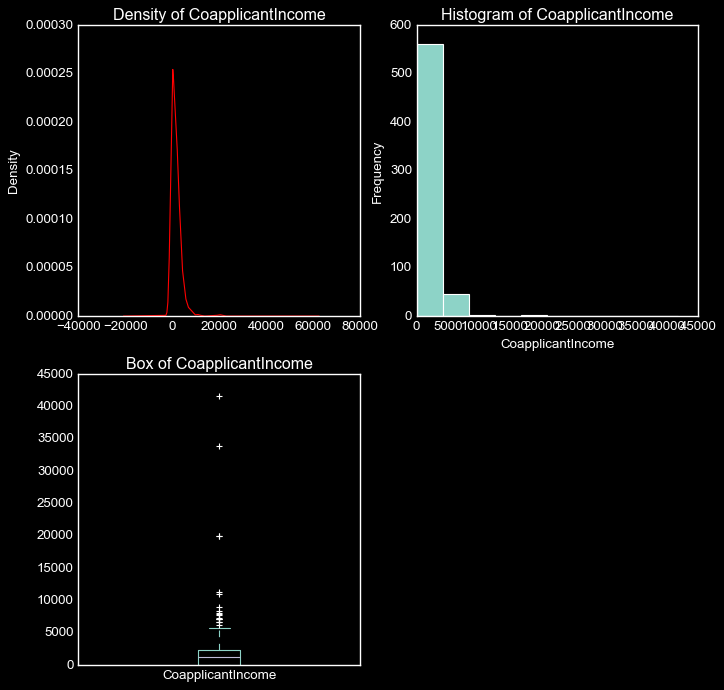

In [57]:
plt.subplot(221)
df['CoapplicantIncome'].plot(kind = 'density',color = 'red',title =  'Density of CoapplicantIncome')

plt.subplot(222)
df['CoapplicantIncome'].plot(kind = 'hist',xlabel = "CoapplicantIncome",title =  'Histogram of CoapplicantIncome')

plt.subplot(223)
df['CoapplicantIncome'].plot(kind = 'box',title =  'Box of CoapplicantIncome',figsize = (10,10))

<Axes: title={'center': 'Histogram of CoapplicantIncome'}, xlabel='CoapplicantIncome', ylabel='Frequency'>

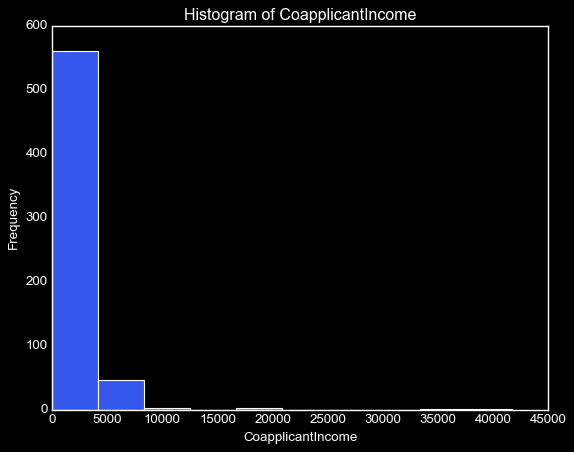

In [58]:
df['CoapplicantIncome'].plot(kind = 'hist',
               xlabel = "CoapplicantIncome",
               color = '#3458eb',
               title =  'Histogram of CoapplicantIncome')

In [59]:
plt.style.use('classic')

<Axes: title={'center': 'Box of LoanAmount'}>

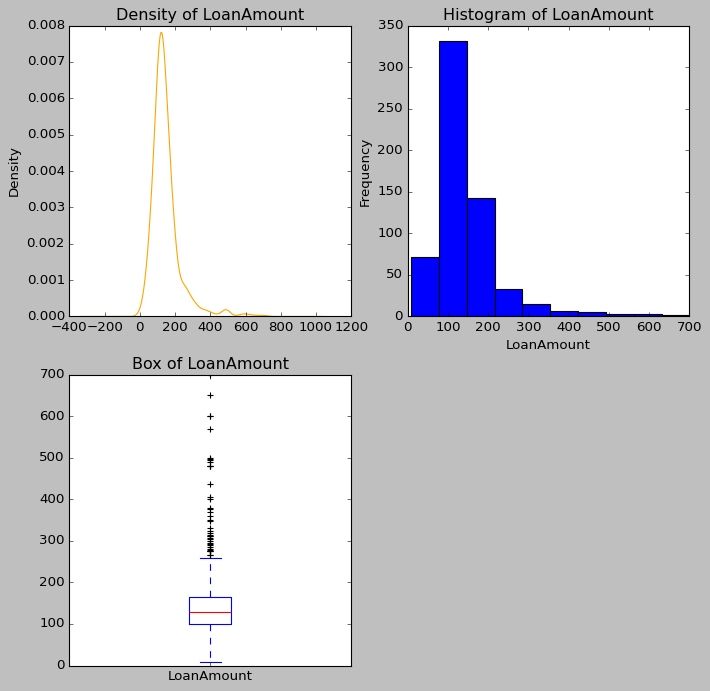

In [60]:
plt.subplot(221)
df['LoanAmount'].plot(kind = 'density',color = 'orange',title =  'Density of LoanAmount')

plt.subplot(222)
df['LoanAmount'].plot(kind = 'hist',xlabel = "LoanAmount",title =  'Histogram of LoanAmount')

plt.subplot(223)
df['LoanAmount'].plot(kind = 'box',title =  'Box of LoanAmount',figsize = (10,10))

Insights from density plot:

* As we can see, the curve is bell shaped curve so the data points are following the normal distribution.

Insights from histogram:
    
* From histogram we can observe that, Loanamount 100 occured around 340 times
* Loanamount 700 occured less than 10 times.

Insights from Boxplot:

* From boxplot, all the values are true values as per the dataset so the values can not be replaced or removed. 

<Axes: title={'center': 'Density of LoanAmount'}, ylabel='Density'>

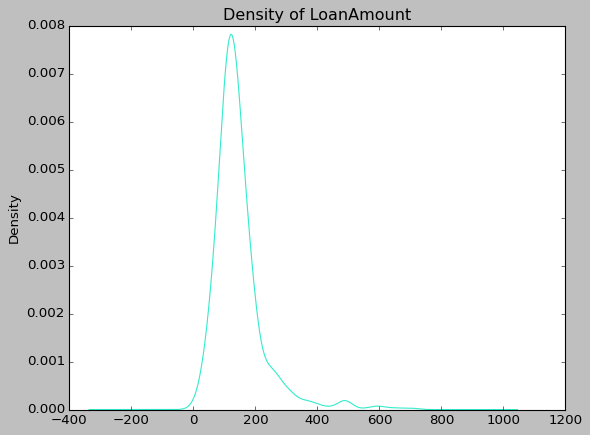

In [61]:
df['LoanAmount'].plot(kind = 'density',
               xlabel = "LoanAmount",
               color = '#34ebcc',
               title =  'Density of LoanAmount')

In [62]:
plt.style.use('fast')

In [63]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='LoanAmount', ylabel='Density'>

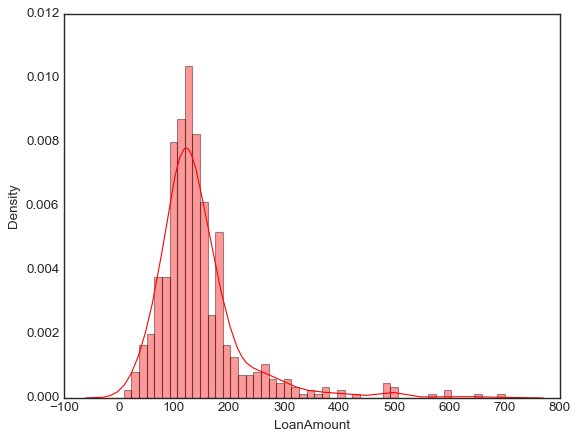

In [69]:
sns.distplot(df['LoanAmount'],bins = 50,color = 'red')

In [68]:
plt.style.use('seaborn-v0_8-white')

### Transformation

In [66]:
df['ApplicantIncome'].mean(),df['ApplicantIncome'].median()

(5403.459283387622, 3812.5)

<Axes: title={'center': 'Box of LoanAmount'}>

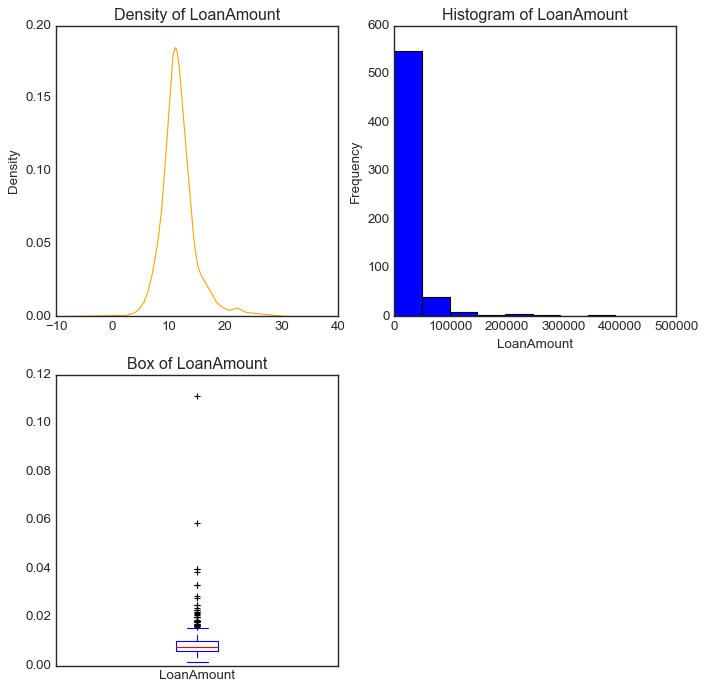

In [67]:
plt.subplot(221)
np.sqrt(df['LoanAmount']).plot(kind = 'density',color = 'orange',title =  'Density of LoanAmount')

plt.subplot(222)
np.square(df['LoanAmount']).plot(kind = 'hist',xlabel = "LoanAmount",title =  'Histogram of LoanAmount')

plt.subplot(223)
np.reciprocal(df['LoanAmount']).plot(kind = 'box',title =  'Box of LoanAmount',figsize = (10,10))